In [2]:
# import os
# import numpy as np
# from keras.preprocessing.image import load_img, img_to_array
# from sklearn.model_selection import train_test_split
# from keras.models import Sequential
# from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# from keras.utils import to_categorical

import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical



# Define paths to the directories
healthy_dir = "Healthy"  # Replace with the path to the healthy directory
late_blight_dir = "Late_Blight"  # Replace with the path to the late_blight directory

# Parameters
image_size = (64, 64)  # Image dimensions (64x64)

# Step 1: Load and preprocess images
def load_images_from_directory(directory, label):
    images = []
    labels = []
    for file in os.listdir(directory):
        if file.endswith(".jpg") or file.endswith(".png"):  # Ensure valid image files
            filepath = os.path.join(directory, file)
            img = load_img(filepath, target_size=image_size)  # Load and resize image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            labels.append(label)
    return images, labels

# Load images and labels for both directories
healthy_images, healthy_labels = load_images_from_directory(healthy_dir, 0)  # Label 0 for healthy
late_blight_images, late_blight_labels = load_images_from_directory(late_blight_dir, 1)  # Label 1 for late_blight

# Combine the data
X = np.array(healthy_images + late_blight_images)
y = np.array(healthy_labels + late_blight_labels)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build the CNN model
cnn_model = Sequential()

cnn_model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 3: Train the CNN model
cnn_model.fit(
    X_train,
    y_train,
    epochs=5,
    batch_size=10,
    validation_split=0.2,  # Use a portion of the training set for validation
    verbose=1
)

# Step 4: Evaluate the model
loss, accuracy = cnn_model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/5
28/28 [==============================] - 3s 77ms/step - loss: 0.3389 - accuracy: 0.8545 - val_loss: 0.0805 - val_accuracy: 1.0000
Epoch 2/5
28/28 [==============================] - 2s 71ms/step - loss: 0.0874 - accuracy: 0.9709 - val_loss: 0.0098 - val_accuracy: 1.0000
Epoch 3/5
28/28 [==============================] - 2s 66ms/step - loss: 0.0333 - accuracy: 0.9818 - val_loss: 0.0058 - val_accuracy: 1.0000
Epoch 4/5
28/28 [==============================] - 2s 76ms/step - loss: 0.0287 - accuracy: 0.9927 - val_loss: 0.0029 - val_accuracy: 1.0000
Epoch 5/5
3/3 [==============================] - 0s 27ms/step - loss: 0.0013 - accuracy: 1.0000
Test Accuracy: 100.00%


1/1 [==============================] - 0s 44ms/step


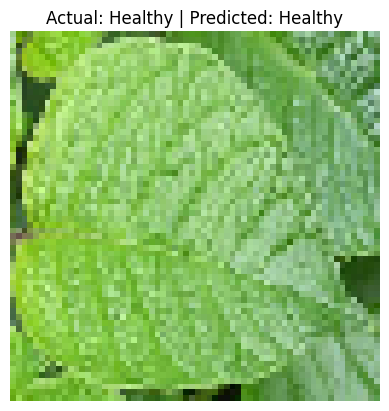

In [5]:
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img

# Step 1: Predict on a random test sample
def predict_random_sample(X_test, y_test, model):
    # Choose a random index from the test set
    random_index = random.randint(0, len(X_test) - 1)

    # Get the random sample and its actual label
    sample_image = X_test[random_index]
    actual_label = y_test[random_index]

    # Reshape for model prediction
    sample_image_reshaped = np.expand_dims(sample_image, axis=0)  # Add batch dimension
    predicted_label = model.predict(sample_image_reshaped)[0][0]  # Predict

    # Convert prediction to binary (0 or 1 based on a threshold of 0.5)
    predicted_class = 1 if predicted_label > 0.5 else 0

    return sample_image, actual_label, predicted_class

# Step 2: Display the image with labels
def display_prediction(sample_image, actual_label, predicted_label):
    # Convert numeric labels to text
    labels_map = {0: "Healthy", 1: "Late Blight"}
    actual_text = labels_map[actual_label]
    predicted_text = labels_map[predicted_label]

    # Display the image
    plt.imshow(array_to_img(sample_image))  # Convert array to image for plotting
    plt.axis('off')  # Hide axis
    plt.title(f"Actual: {actual_text} | Predicted: {predicted_text}", fontsize=12)
    plt.show()

# Step 3: Run the prediction and visualization
sample_image, actual_label, predicted_label = predict_random_sample(X_test, y_test, cnn_model)
display_prediction(sample_image, actual_label, predicted_label)


using linear regression

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load and Clean Dataset
data = pd.read_csv("yield_dataset.csv")
data.dropna(inplace=True)  # Remove rows with missing values

# Ensure all columns are numeric
data['Temperatue'] = pd.to_numeric(data['Temperatue'], errors='coerce')
X = data.drop('Yeild (Q/acre)', axis=1)  # Features
y = data['Yeild (Q/acre)']  # Target

# Step 2: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 4: Evaluate Model
y_pred = linear_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 5: Recommendation System
def recommend(yield_prediction):
    if yield_prediction < 50:
        return "Low yield predicted! Recommended action: Improve irrigation and soil quality."
    else:
        return "Yield prediction is optimal."

# Display Sample Predictions with Recommendations
sample_test = X_test.sample(5, random_state=42)
predicted_yields = linear_model.predict(sample_test)

for index, prediction in enumerate(predicted_yields):
    print(f"Predicted Yield: {prediction:.2f} Q/acre, Recommendation: {recommend(prediction)}")


Mean Squared Error: 0.44
R^2 Score: 0.91
Predicted Yield: 11.11 Q/acre, Recommendation: Low yield predicted! Recommended action: Improve irrigation and soil quality.
Predicted Yield: 10.81 Q/acre, Recommendation: Low yield predicted! Recommended action: Improve irrigation and soil quality.
Predicted Yield: 10.77 Q/acre, Recommendation: Low yield predicted! Recommended action: Improve irrigation and soil quality.
Predicted Yield: 11.12 Q/acre, Recommendation: Low yield predicted! Recommended action: Improve irrigation and soil quality.
Predicted Yield: 11.49 Q/acre, Recommendation: Low yield predicted! Recommended action: Improve irrigation and soil quality.


using random forest

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
# Replace with the correct path to your dataset
data = pd.read_csv("yield_dataset.csv")

data.dropna(inplace=True)

data.head()

# Step 2: Separate features and target variable
X = data.drop('Yeild (Q/acre)', axis=1)  # Drop the target column to create feature set
y = data['Yeild (Q/acre)']  # Target variable

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

data.dtypes

# data['Temperatue'] = data['Temperatue'].str.extract(r'([-+]?\d*\.?\d+)')  # Extract numeric part
data['Temperatue'] = pd.to_numeric(data['Temperatue'], errors='coerce')  # Convert to numeric

# Step 4: Train the Random Forest model
yield_model = RandomForestRegressor(n_estimators=100, random_state=42)
yield_model.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = yield_model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# proportion of variance explained by the model. An R² score of 1 means the model explains all the variance, while a score close to 0 indicates poor model performance.
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

# Step 3: Simple Recommendation System
def recommend(disease_prediction, yield_prediction):
    if disease_prediction >= 0.5:
      return "Disease detected! Recommended action: Apply pesticide."
    elif yield_prediction < 50:
      return "Low yield predicted! Recommended action: Improve irrigation and soil quality."
    else:
      return "Crop is healthy and yield prediction is optimal."

random_sample = X_test.sample(n=10, random_state=42)
# Get the corresponding true values
true_values = y_test[random_sample.index]
# Predict on the random sample
predicted_values = yield_model.predict(random_sample)
# Print the actual vs predicted values
for actual, predicted in zip(true_values, predicted_values):
    print(f"Actual: {actual:.2f}, Predicted: {predicted:.2f}")


Mean Squared Error: 0.51
R^2 Score: 0.89
Actual: 11.00, Predicted: 10.95
Actual: 11.00, Predicted: 10.15
Actual: 11.00, Predicted: 11.02
Actual: 11.00, Predicted: 10.30
Actual: 12.00, Predicted: 11.76
Actual: 9.00, Predicted: 10.62
Actual: 12.00, Predicted: 11.88
Actual: 11.00, Predicted: 10.08
Actual: 11.00, Predicted: 10.37
Actual: 7.00, Predicted: 7.57
